# TASK1

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn import preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('DS2_C5_S3_Income_Data_Challenge.csv')
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.shape

(32561, 15)

In [10]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [11]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# TASK2

In [12]:
df.isna().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

# No Missing Value 

In [13]:
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [14]:
df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Race','Gender','Native_Country','Income_Bracket']]=df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Race','Gender','Native_Country','Income_Bracket']].astype('category')

In [15]:
df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Race              category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [16]:
LabelEncoder=preprocessing.LabelEncoder()

In [17]:
df['WorkClass']= LabelEncoder.fit_transform(df['WorkClass'])

In [18]:
df['Education']=LabelEncoder.fit_transform(df['Education'])

In [19]:
df['Marital_Status'] = LabelEncoder.fit_transform(df['Marital_Status'])

In [20]:
df['Occupation'] = LabelEncoder.fit_transform(df['Occupation'])

In [21]:
df['Relationship'] = LabelEncoder.fit_transform(df['Relationship'])

In [22]:
df['Race'] = LabelEncoder.fit_transform(df['Race'])
df['Gender'] = LabelEncoder.fit_transform(df['Gender'])
df['Native_Country'] = LabelEncoder.fit_transform(df['Native_Country'])
df['Income_Bracket'] = LabelEncoder.fit_transform(df['Income_Bracket']) #<=50k=0 <50k =1
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [23]:
df.dtypes

Age               int64
WorkClass         int32
Fnlwgt            int64
Education         int32
Education_Num     int64
Marital_Status    int32
Occupation        int32
Relationship      int32
Race              int32
Gender            int32
Capital_Gain      int64
Capital_Loss      int64
Hours_Per_Week    int64
Native_Country    int32
Income_Bracket    int32
dtype: object

In [24]:
numerics = ['int32', 'int64']
new_df=df.select_dtypes(include=numerics)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)


In [25]:
df_scaled.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [26]:
corr=df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_Num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


In [27]:
corr['Income_Bracket']

Age               0.234037
WorkClass         0.051604
Fnlwgt           -0.009463
Education         0.079317
Education_Num     0.335154
Marital_Status   -0.199307
Occupation        0.075468
Relationship     -0.250918
Race              0.071846
Gender            0.215980
Capital_Gain      0.223329
Capital_Loss      0.150526
Hours_Per_Week    0.229689
Native_Country    0.015840
Income_Bracket    1.000000
Name: Income_Bracket, dtype: float64

In [28]:
df=df_scaled[['Age','Fnlwgt','Education_Num','Marital_Status','Relationship','Gender','Capital_Gain','Capital_Loss','Hours_Per_Week','Income_Bracket']]

In [29]:
df

,Age,Fnlwgt,Education_Num,Marital_Status,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Income_Bracket
0,0.301370,0.044302,0.800000,0.666667,0.2,1.0,0.021740,0.0,0.397959,0.0
1,0.452055,0.048238,0.800000,0.333333,0.0,1.0,0.000000,0.0,0.122449,0.0
2,0.287671,0.138113,0.533333,0.000000,0.2,1.0,0.000000,0.0,0.397959,0.0
3,0.493151,0.151068,0.400000,0.333333,0.0,1.0,0.000000,0.0,0.397959,0.0
4,0.150685,0.221488,0.800000,0.333333,1.0,0.0,0.000000,0.0,0.397959,0.0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.333333,1.0,0.0,0.000000,0.0,0.377551,0.0
32557,0.315068,0.096500,0.533333,0.333333,0.0,1.0,0.000000,0.0,0.397959,1.0
32558,0.561644,0.094827,0.533333,1.000000,0.8,0.0,0.000000,0.0,0.397959,0.0
32559,0.068493,0.128499,0.533333,0.666667,0.6,1.0,0.000000,0.0,0.193878,0.0


## Data Split

In [30]:
train_num=int(len(df)*0.8)

In [31]:
train=df.iloc[:train_num,:]

In [32]:
test=df.iloc[(train_num+1):,:]

In [33]:
X_train = train.iloc[:,:-1]

In [34]:
X_test = test.iloc[:,:-1]

In [35]:
y_train=train.Income_Bracket

In [36]:
y_test=test.Income_Bracket

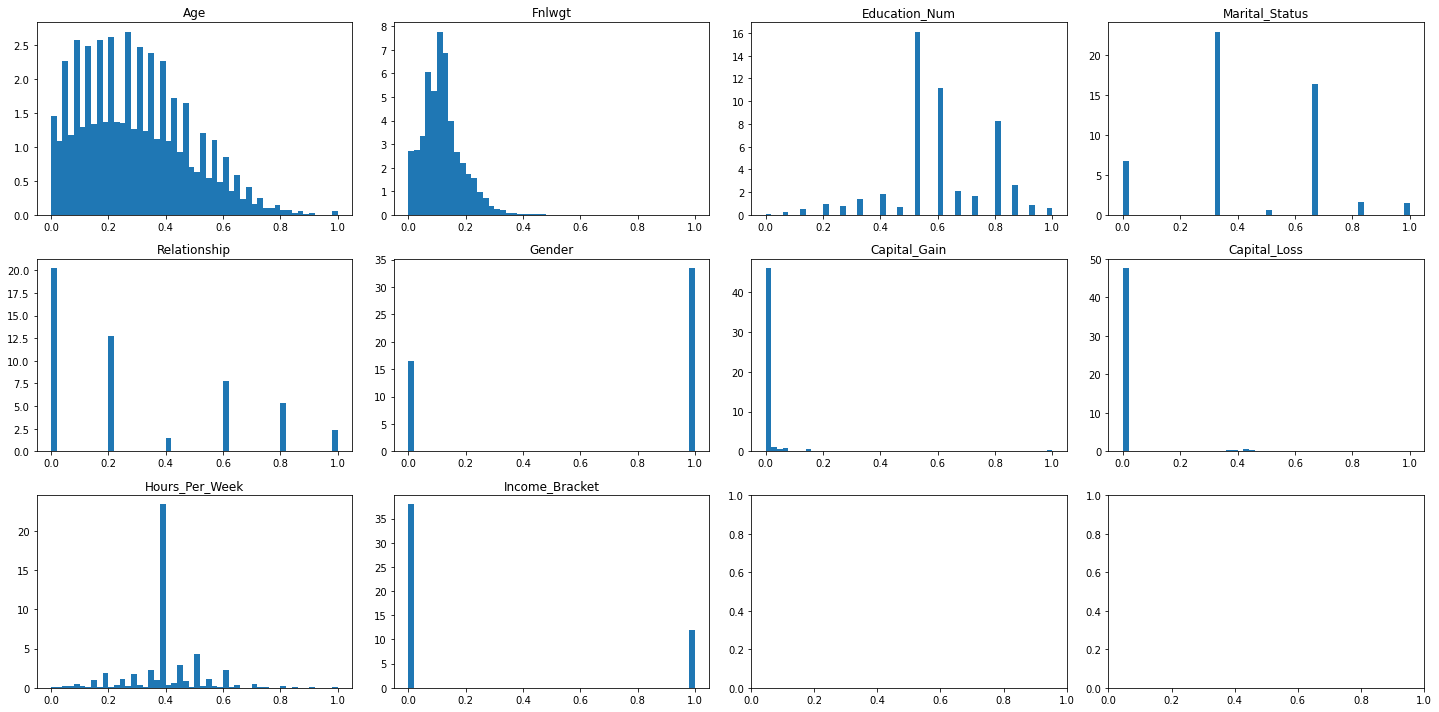

In [37]:
new_income_df = df
numeric_cols=new_income_df.columns
num_cols=4
n_bins = 50
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_income_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()

# TASK3

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
# Accuracy of train data
model.score(X_train, y_train)

0.8223664004914005

In [42]:
# Accuracy of test data
model.score(X_test, y_test)

0.8243243243243243

In [43]:
Coef=pd.Series(model.coef_[0], index=X_train.columns)
Coef.sort_values(ascending=False)

Capital_Gain      16.938508
Education_Num      4.870888
Hours_Per_Week     2.813920
Capital_Loss       2.660924
Age                2.430226
Gender             0.875829
Fnlwgt             0.678810
Relationship      -0.607823
Marital_Status    -1.357063
dtype: float64

# TASK4

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[4654  258]
 [ 886  714]]


In [45]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)

4654 258 886 714


In [46]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))


Accuracy: 0.8243243243243243
Recall: 0.44625
f1-score: 0.5552099533437014
Precision: 0.7345679012345679


In [47]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc #
#help(roc_auc_score)

0.8615415054967427

In [48]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.697


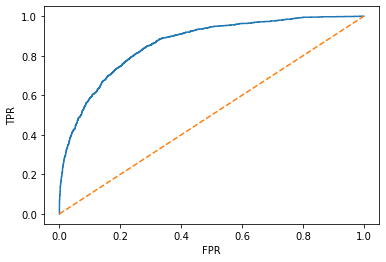

In [49]:
from sklearn.metrics import roc_curve
positive_prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, positive_prob)
plt.plot(fpr,tpr,label="Logistic Regression")
plt.plot([0,1],[0,1],linestyle='--',label="No skill")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()